# Smart E-commerce Catalog Data Analysis

##4. ANOVA on E-commerce Data

### Comparing Ratings Across Categories

#### We can use ANOVA to determine if there are statistically significant differences in average ratings among different product categories

**Hypothesis:**

- **Null Hypothesis `(H0)`: There is no difference in average ratings across categories.**

- **Alternative Hypothesis (H1): At least one category has a different average rating.**

**Significance Level** :`5%, '0.05'`

####1. Importing the dataset


In [0]:
import pandas as pd 
product_df = spark.sql("SELECT * FROM product_db.product_table")
product_pd_df = product_df.toPandas()
product_pd_df.head(10)

,product_id,product_name,category,price,stock,rating,launch_date,description,is_active
0,501,Product 501,Electronics,267.600006,1,3.4,2024-08-06,This is a great product.,False
1,502,Product 502,Home,362.600006,80,4.0,2024-04-02,This is a great product.,False
2,503,Product 503,Clothing,47.910000,12,1.6,2024-08-27,This is a great product.,False
3,504,Product 504,Home,481.809998,40,4.2,2024-06-25,This is a great product.,False
4,505,Product 505,Electronics,127.839996,76,3.4,2023-12-23,This is a great product.,False
5,506,Product 506,Electronics,424.709991,84,4.5,2024-07-16,This is a great product.,True
6,507,Product 507,Books,151.289993,6,4.1,2024-06-29,This is a great product.,False
7,508,Product 508,Books,60.810001,63,3.6,2024-09-23,This is a great product.,True
8,509,Product 509,Home,467.290009,16,2.5,2024-01-12,This is a great product.,False
9,510,Product 510,Home,275.450012,22,4.1,2024-09-22,This is a great product.,True


####2. Checking Data Types and Clean Up
- Converting 'category' to a categorical type if it isn't already
- Dropping rows with missing ratings


In [0]:
# Convert 'category' to a categorical type if it isn't already
product_pd_df['category'] = product_pd_df['category'].astype('category')

# Drop rows with missing ratings
product_pd_df = product_pd_df[product_pd_df['rating'].notnull()]

####3. Performing ANOVA
- fitting an ANOVA model to compare ratings across categories

In [0]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('rating ~ C(category)', data=product_pd_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
anova_table


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

,sum_sq,df,F,PR(>F)
C(category),13.019679,4.0,2.38574,0.049603
Residual,1357.501428,995.0,NaN,NaN


- The P-value is almost 0.049603

####4.Conducting Post-Hoc Analysis:

Since the ANOVA is near to 5%, performing post-hoc tests (Tukey's HSD) can help identify specific groups that differ. This might clarify whether the differences are substantial or negligible.

In [0]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Conduct Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=product_pd_df['rating'], groups=product_pd_df['category'], alpha=0.05)

# Display the results
print(tukey_results)


     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
      Books    Clothing  -0.2308 0.2869 -0.5528 0.0911  False
      Books Electronics  -0.0949 0.9253 -0.4122 0.2224  False
      Books        Home  -0.2867 0.0978 -0.6035 0.0302  False
      Books        Toys  -0.2819 0.1027  -0.596 0.0323  False
   Clothing Electronics   0.1359 0.7829 -0.1887 0.4606  False
   Clothing        Home  -0.0558   0.99 -0.3801 0.2684  False
   Clothing        Toys   -0.051 0.9926 -0.3726 0.2706  False
Electronics        Home  -0.1917 0.4724 -0.5114 0.1279  False
Electronics        Toys  -0.1869 0.4899 -0.5038 0.1299  False
       Home        Toys   0.0048    1.0 -0.3117 0.3213  False
-------------------------------------------------------------


####5. Key Points to Interpret
**Mean Differences (meandiff):**

- The meandiff column shows the difference in means between the groups. For instance, the average rating for Books is approximately 0.23 lower than Clothing, and 0.29 lower than Home.

**p-adjusted Values (p-adj):**

- The p-adj values indicate the adjusted p-values for each comparison.

- All comparisons have p-values greater than 0.05, meaning none of the differences are statistically significant at the 5% level.

**Reject Column:**

- The reject column indicates whether to reject the null hypothesis (True means there is a significant difference).

- All values are False, which means there is no statistically significant difference in average ratings between any of the compared categories.

**Conclusion**

No Significant Differences: Based on the Tukey's HSD results, I conclude that there are `No statistically significant differences` in ratings among the categories (Books, Clothing, Electronics, Home, Toys) at the `5% significance level`.

Practical Implications: This suggests that while there might be variations in ratings, they are not statistically significant enough to suggest that consumers perceive these categories differently based on the ratings provided.

####6. Visualizing Results


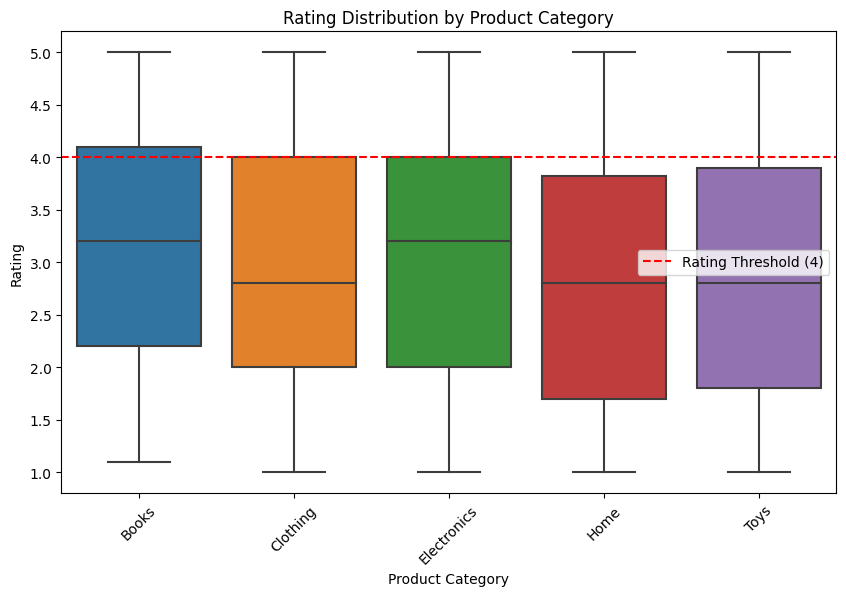

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=product_pd_df, x='category', y='rating')
plt.title('Rating Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.axhline(y=4, color='red', linestyle='--', label='Rating Threshold (4)')
plt.legend()
plt.show()
